# About 시각화

## Line Plot

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df_kospi = pd.read_csv('KOSPI.csv', index_col = 'Date')
df_kospi

,Close
Date,
2020-01-02,2175.17
2020-01-03,2176.46
2020-01-06,2155.07
2020-01-07,2175.54
2020-01-08,2151.31
...,...
2021-12-13,3001.66
2021-12-14,2987.95
2021-12-15,2989.39


<AxesSubplot:xlabel='Date'>

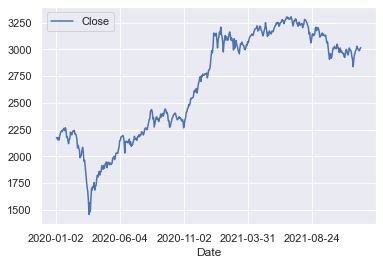

In [2]:
df_kospi.plot()

<Figure size 432x288 with 0 Axes>

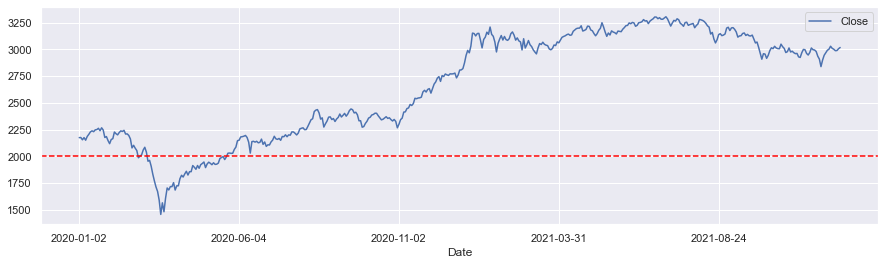

In [3]:
plt.figure() #도화지를 생성

df_kospi.plot(figsize = (15,4))

plt.axhline(2000, linestyle = '--', color = 'red')

plt.show()

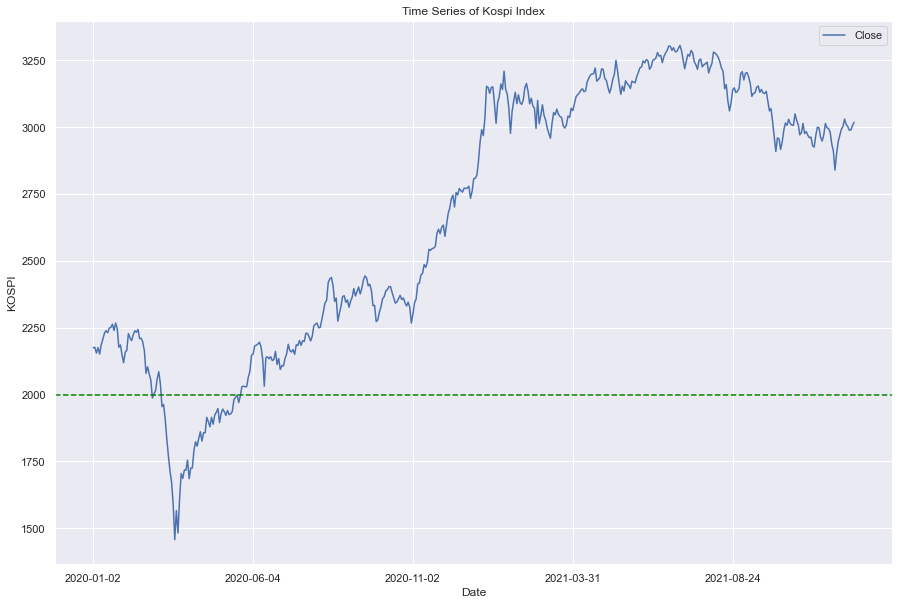

In [4]:
fig, ax = plt.subplots()

df_kospi.plot(kind = 'line', ax = ax, figsize = (15,10))

ax.axhline(2000, linestyle = '--', color = 'green')

ax.set(xlabel = "Date", ylabel = 'KOSPI', title = 'Time Series of Kospi Index')

plt.show()

## 두개 이상의 그래프

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df_samsung = pd.read_excel('samsung_naver_excel.xlsx', sheet_name=0, index_col = 'Date')
df_samsung

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2018-01-02,51380,51400,50780,51020,169485,0.001177
2018-01-03,52540,52560,51420,51620,200270,0.011760
2018-01-04,52120,52180,50640,51080,233909,-0.010461
2018-01-05,51300,52120,51200,52120,189623,0.020360
2018-01-08,52400,52520,51500,52020,167673,-0.001919
...,...,...,...,...,...,...
2020-12-23,72400,74000,72300,73900,19411326,0.022130
2020-12-24,74100,78800,74000,77800,32502870,0.052774
2020-12-28,79000,80100,78200,78700,40085044,0.011568


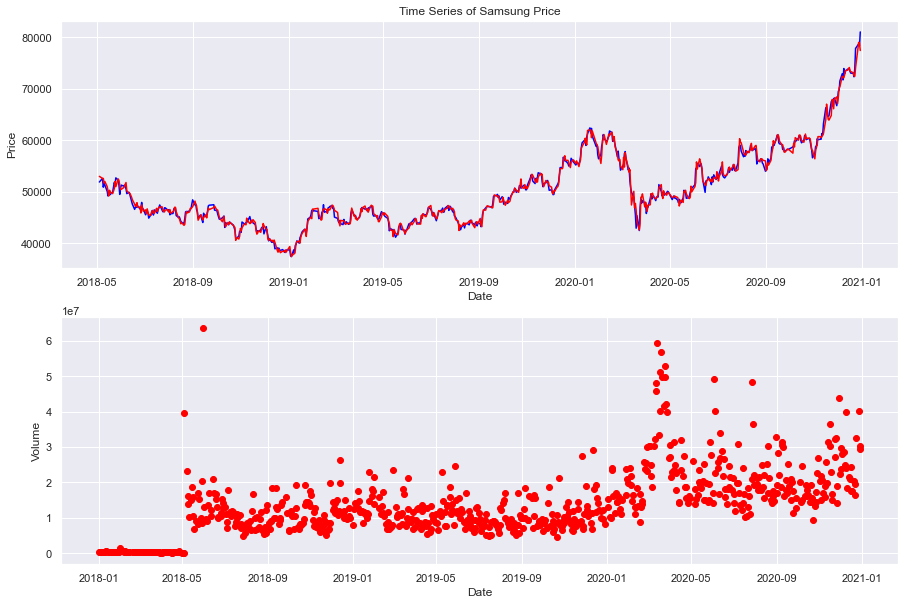

In [7]:
fig, axs = plt.subplots(2,1, figsize = (15,10))

axs[0].plot(df_samsung['Close']['2018-05-04':], color = 'blue')

axs[0].grid(True)

axs[0].set(xlabel = "Date", ylabel = 'Price', title = 'Time Series of Samsung Price')

axs[0].plot(df_samsung['Open']['2018-05-04':], color = 'red')

axs[1].scatter(df_samsung.index, df_samsung['Volume'], color = 'red')

axs[1].grid(True)

axs[1].set(xlabel = "Date", ylabel = 'Volume')

plt.show()

## Option

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.rcParams["figure.figsize"] = (22,15)
plt.rc('font', family = 'Malgun Gothic')
plt.rcParams["font.size"] = 15
plt.rc('axes', unicode_minus = False)

df = pd.read_excel('samsung_kospi_excel.xlsx', sheet_name=0, index_col = 'Date')
df = df.loc['2018-01-02':]
df

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2018-01-02,51380,51400,50780,51020,169485,0.001177
2018-01-03,52540,52560,51420,51620,200270,0.011760
2018-01-04,52120,52180,50640,51080,233909,-0.010461
2018-01-05,51300,52120,51200,52120,189623,0.020360
2018-01-08,52400,52520,51500,52020,167673,-0.001919
...,...,...,...,...,...,...
2021-12-20,77600,77800,76800,77100,11264375,-0.011538
2021-12-21,77900,78300,77500,78100,14245298,0.012970
2021-12-22,78900,79400,78800,79400,17105892,0.016645


In [9]:
df.index[df['Close'].argmax()]

Timestamp('2021-01-11 00:00:00')

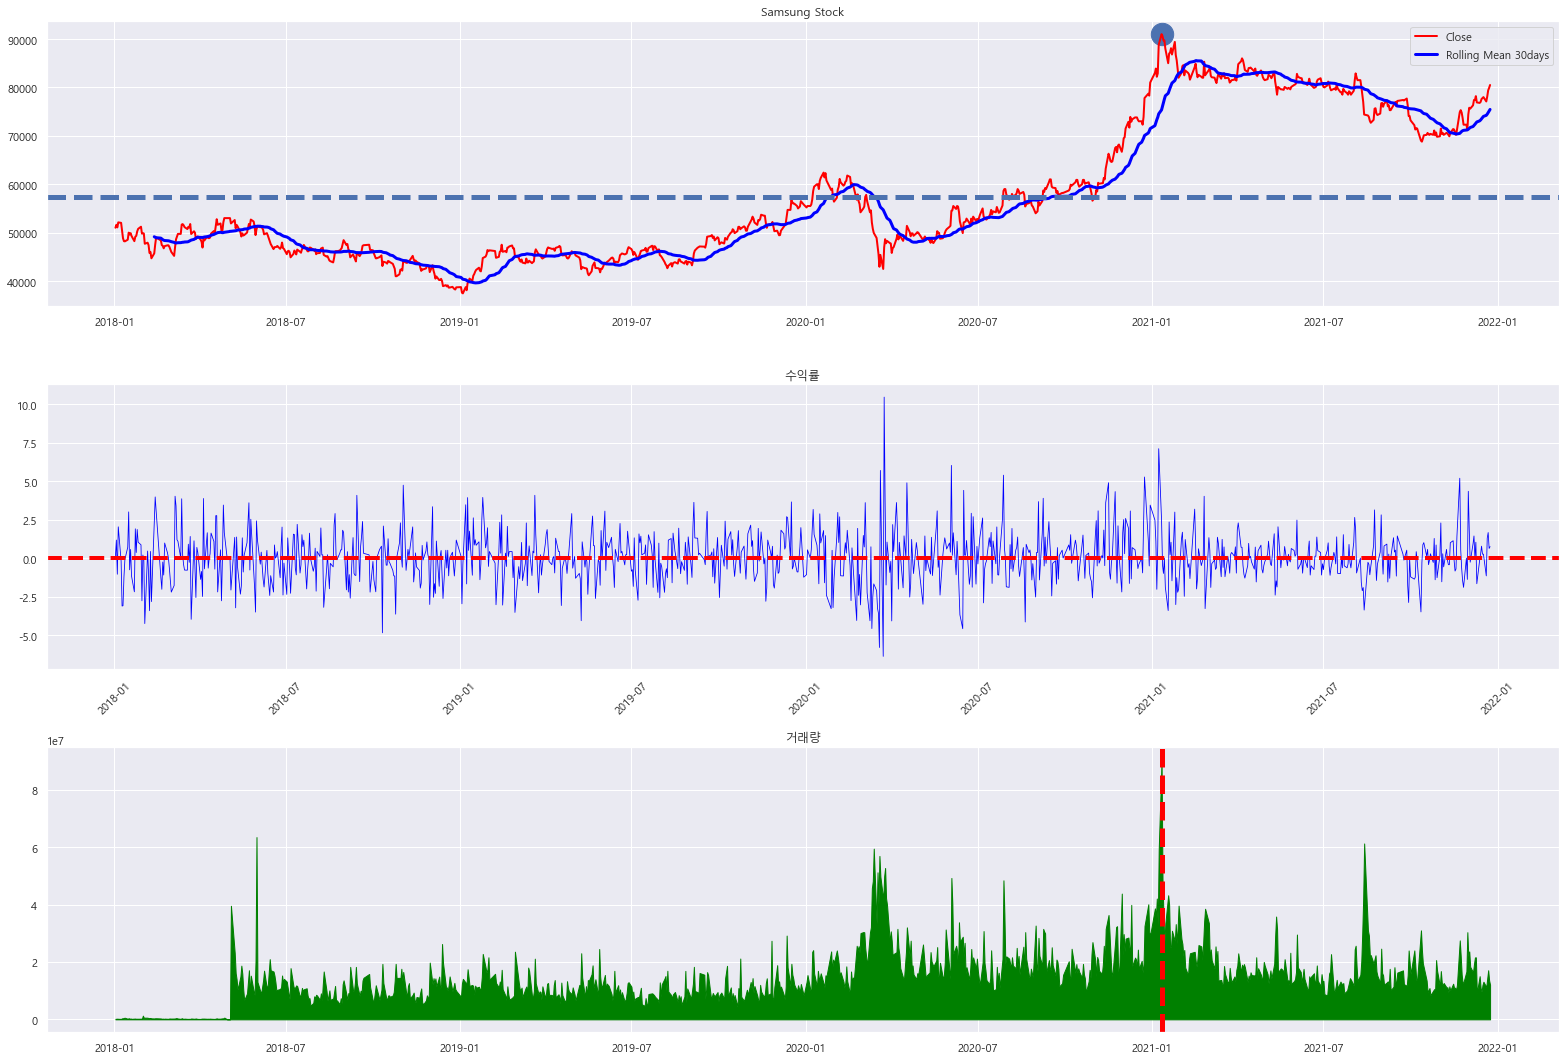

In [10]:
fig, axes = plt.subplots(3,1, sharex = False)

axes[0].plot(df['Close'], color = 'red', linewidth = 2)
axes[0].plot(df['Close'].rolling(window = 30).mean(), color = 'blue', linewidth = 3)
axes[0].axhline(df['Close'].mean(), linestyle = '--', linewidth = 5)
axes[0].scatter(df.index[df['Close'].argmax()], df['Close'].max(), marker = 'o',s = 500)
axes[0].legend(['Close', 'Rolling Mean 30days'])
axes[0].set_title("Samsung Stock")

axes[1].plot(df['Change']*100, color ='blue', linewidth = 0.8)
axes[1].axhline(0, linestyle = '--', linewidth = 4, color = 'red')
axes[1].tick_params(axis = 'x', labelrotation = 45)
axes[1].set_title("수익률")

axes[2].fill_between(df.index, df['Volume'], color = 'green', alpha = 1)
axes[2].set_title("거래량")
axes[2].axvline(df.index[df['Volume'].argmax()], color = 'red', linewidth = 5, linestyle = '--')

plt.tight_layout()
plt.show()